# Risk management study for flight safety operations
Constrained by several regulations and high performance expectations, we have to follow thoroughly each of its operations by the means of reports redacted by field actors, may it be Pilots, Cabin Crew, Cargo or Maintenance operators etc. These post operation reports aim at identifying threats and negative events which can have consequences on operations. Today, more than 1200 reports are redacted each months. These reports are then analysed by a few risk assessment departments whose mission are to build risk models, alerts and mitigation processes to embetter our global operations. In the field of flight safety, these reports lead to more than 600 reports each months analysed by 40 flight safety events analysts distributed in our business units and 7 flight safety system analyst working on risk models. The current risk model used is the Bow Tie, encouraged by norm ISO 31000.
The following study aims at building an algorithm to identify the mitigation and restoring barriers for each risk scenario which have the higher fault probabilities, meaning an improvement action should be taken on these barriers.
Datas have been extracted from SAP in the csv format for one risk scenario.
Attention need to be given on :
-A barrier can be Applicable or Not applicable (for operational reasons ex:system not available on the aircraft), and for an applicable barrier the barrier can be used or not used (case of several options possible)
-Unidentified use of barriers, in the report sometimes an analyst doesn't fill out the use of a barrier for several reasons (he doesn't have the information, or for time reasons he only fills out the applicable barriers, data quality is a known issue being adressed at company level).
-Software issues, the report process leave out all the barriers that have never been used so for a new barrier to appear in reports they need to have been used at least once. This creates statistic problems since the number of occurence since first use of a barrier is lost.
-Imbalanced dataset, luckily for us event are unfrequent and consequences even less, so the interpretability of fault defaillance tree is questionable when very few occurences have been observed. We aim at compensating this issue with the use of expert opinion.

First of all we give 2 definitions of Threats and Events of particular interest, before working on their barriers.
Threats which are the least prevented are calculated by the number of time a threat has led to an event divided by the number of time the threat has occured

Events which are the restored are calculated by the number of time an event has led to a consequence divided by the number of time the event has occured

## Find the 10 barriers with the highest default rates
Our aim in this section will be to extract from the data the 10 prevention barriers with the highest default rates, and the 10 restoration barriers with the highest default rates. For this we'll calculate the number of time each barrier has been used and every time a barrier has been used and failed.

In [1]:
import pandas as pd
import numpy as np
# Datas have first been corrected since some columns contain free text, conversion to csv needed the removal of previous commas 
prevention=pd.read_csv("/home/reddowan/Documents/AirFrance/prevention2.csv")
recuperation=pd.read_csv("/home/reddowan/Documents/AirFrance/recuperation2.csv")

In [2]:
# We verify the dimension of the dataframes created to make sure there is no error in the importation process
print 'the dimension of prevention dataframe is',(np.shape(prevention))
print 'the dimension of recuperation dataframe is',(np.shape(recuperation))

the dimension of prevention dataframe is (3812, 9)
the dimension of recuperation dataframe is (4300, 9)


In [3]:
# We visualize the dataframes to make sure there is no error in the importation process
prevention

,Document reference,Top event family code,Top event code,Threat (Bowtie),Threat Id,Control,Control Id,Control status,Top event status
0,REPORT-2016-000508,GH,GH 9.2,THR-112 - Initiating pushback before parkbrake...,THR-112,Flight Crew adhere to Departure communication ...,FLT-P-0213,Undefined,Not occurred
1,REPORT-2016-000508,GH,GH 9.2,THR-112 - Initiating pushback before parkbrake...,THR-112,Ground Staff adhere to pushback procedures,GND-P-0469,Undefined,Not occurred
2,REPORT-2016-000508,GH,GH 9.2,THR-112 - Initiating pushback before parkbrake...,THR-112,Ground Staff adhere to the departure communica...,GND-P-0471,Undefined,Not occurred
3,REPORT-2016-000508,GH,GH 9.2,THR-112 - Initiating pushback before parkbrake...,THR-112,Ground Staff check aircraft parkbrake indicator,GND-P-0479,Not applied,Not occurred
4,REPORT-2016-000508,GH,GH 9.2,THR-112 - Initiating pushback before parkbrake...,THR-112,MRO perform preventive maintenance program item,MNT-P-0593,Applied,Not occurred
5,REPORT-2016-000561,GH,GH 9.2,THR-100 - Ground service equipment/ vehicle im...,THR-100,Equipment operator report any signs of damage ...,GND-P-0207,Undefined,Not occurred
6,REPORT-2016-000561,GH,GH 9.2,THR-100 - Ground service equipment/ vehicle im...,THR-100,Flight Crew detect and report impact/ damage v...,FLT-P-0339,Undefined,Not occurred
7,REPORT-2016-000561,GH,GH 9.2,THR-100 - Ground service equipment/ vehicle im...,THR-100,Ground Service Equipment is designed and maint...,GND-P-0466,Undefined,Not occurred
8,REPORT-2016-000561,GH,GH 9.2,THR-100 - Ground service equipment/ vehicle im...,THR-100,Ground Staff operate safely GSE,GND-P-0503,Undefined,Not occurred
9,REPORT-2016-000561,GH,GH 9.2,THR-100 - Ground service equipment/ vehicle im...,THR-100,Ground Staff report any signs of damage detect...,GND-P-0512,Applied,Not occurred


In [4]:
# We visualize the dataframes to make sure there is no error in the importation process
recuperation

,Document reference,Top event family code,Top event code,Control status,Consequence Id,Consequence,Control,Control Id,Control status.1
0,REPORT-2015-055562,GH,GH 9.2,Applied,NaN,NaN,Equipment operator report any signs of damage ...,GND-P-0207,Applied
1,REPORT-2015-055562,GH,GH 9.2,Applied,NaN,NaN,Ground Staff operate safely GSE,GND-P-0503,Applied
2,REPORT-2015-055562,GH,GH 9.2,Applied,NaN,NaN,MRO perform preventive maintenance program item,MNT-P-0593,Applied
3,REPORT-2015-055562,GH,GH 9.2,Not applicable,NaN,NaN,Flight Crew detect and report impact/ damage v...,FLT-P-0339,Not applicable
4,REPORT-2015-055562,GH,GH 9.2,Not applicable,NaN,NaN,Ground Staff report any signs of damage detect...,GND-P-0512,Not applicable
5,REPORT-2015-055562,GH,GH 9.2,Not applicable,NaN,NaN,Ground Staff report any signs of damage or ano...,GND-P-0514,Not applicable
6,REPORT-2015-055562,GH,GH 9.2,Not applicable,NaN,NaN,Maintenance Engineer detect and report any fau...,MNT-PR-0572,Not applicable
7,REPORT-2015-055562,GH,GH 9.2,Not applied,NaN,NaN,Ground Service Equipment is designed and maint...,GND-P-0466,Not applied
8,REPORT-2015-055955,GH,GH 9.2,Applied,NaN,NaN,Ground Staff report any signs of damage detect...,GND-P-0513,Applied
9,REPORT-2015-055955,GH,GH 9.2,Not applicable,NaN,NaN,Flight Crew detect and report impact/ damage v...,FLT-P-0339,Not applicable


In [5]:
#Let's see for visualization purposes the number of flight safety reports involved in this experimental set
print 'number of reports involved in prevention set',np.size(np.unique(prevention['Document reference']))
print 'number of reports involved in recuperation set',np.size(np.unique(recuperation['Document reference']))


number of reports involved in prevention set 746
number of reports involved in recuperation set 825


In [6]:
# Here we create a table listing each prevention barrier (or control) and we had two columns, the number of time the barrier has been used and the number of time barrier failed.
prevention_control=pd.DataFrame(prevention,columns=['Control Id','Control'])
prevention_control=prevention_control.drop_duplicates()
prevention_control['Total number of time used']=0
prevention_control['Number of time used but event occurred']=0
prevention_control['Default rate']=0

In [7]:
# We verify the dimensions of the newly created dataframe, the number of row equals the number of different prevention barriers found in the data
print np.shape(prevention_control)
prevention_control

(35, 5)


,Control Id,Control,Total number of time used,Number of time used but event occurred,Default rate
0,FLT-P-0213,Flight Crew adhere to Departure communication ...,0,0,0
1,GND-P-0469,Ground Staff adhere to pushback procedures,0,0,0
2,GND-P-0471,Ground Staff adhere to the departure communica...,0,0,0
3,GND-P-0479,Ground Staff check aircraft parkbrake indicator,0,0,0
4,MNT-P-0593,MRO perform preventive maintenance program item,0,0,0
5,GND-P-0207,Equipment operator report any signs of damage ...,0,0,0
6,FLT-P-0339,Flight Crew detect and report impact/ damage v...,0,0,0
7,GND-P-0466,Ground Service Equipment is designed and maint...,0,0,0
8,GND-P-0503,Ground Staff operate safely GSE,0,0,0
9,GND-P-0512,Ground Staff report any signs of damage detect...,0,0,0


In [8]:
# For each prevention barrier we calculate the number of time the barrier has been used and the number of time the barrier has failed 
for index,row in prevention_control.iterrows() :
    ctrl_id=row['Control Id']
    i=0
    j=0
    for index2,row2 in prevention.iterrows() :
        if row2['Control Id']==ctrl_id and row2['Control status']=='Applied':
            i+=1
        if row2['Control Id']==ctrl_id and row2['Control status']=='Applied' and row2['Top event status']=='Occurred':
            j+=1
    prevention_control.loc[index,'Total number of time used']=i
    prevention_control.loc[index,'Number of time used but event occurred']=j

In [9]:
# Let's visualize the dataframe to verify it has been updated.
prevention_control

,Control Id,Control,Total number of time used,Number of time used but event occurred,Default rate
0,FLT-P-0213,Flight Crew adhere to Departure communication ...,4,0,0
1,GND-P-0469,Ground Staff adhere to pushback procedures,2,0,0
2,GND-P-0471,Ground Staff adhere to the departure communica...,1,0,0
3,GND-P-0479,Ground Staff check aircraft parkbrake indicator,0,0,0
4,MNT-P-0593,MRO perform preventive maintenance program item,37,0,0
5,GND-P-0207,Equipment operator report any signs of damage ...,21,0,0
6,FLT-P-0339,Flight Crew detect and report impact/ damage v...,6,2,0
7,GND-P-0466,Ground Service Equipment is designed and maint...,16,1,0
8,GND-P-0503,Ground Staff operate safely GSE,5,0,0
9,GND-P-0512,Ground Staff report any signs of damage detect...,40,6,0


In [10]:
#We calculate the Default rate based on the two other columns. The default rate is simply the number of time the barrier failed divided by the total number of time the barrier has been used
prevention_control['Default rate']=(prevention_control['Number of time used but event occurred']/prevention_control['Total number of time used'])

In [11]:
# Let's visualize the Default rate updated for each row 
prevention_control

,Control Id,Control,Total number of time used,Number of time used but event occurred,Default rate
0,FLT-P-0213,Flight Crew adhere to Departure communication ...,4,0,0.000000
1,GND-P-0469,Ground Staff adhere to pushback procedures,2,0,0.000000
2,GND-P-0471,Ground Staff adhere to the departure communica...,1,0,0.000000
3,GND-P-0479,Ground Staff check aircraft parkbrake indicator,0,0,NaN
4,MNT-P-0593,MRO perform preventive maintenance program item,37,0,0.000000
5,GND-P-0207,Equipment operator report any signs of damage ...,21,0,0.000000
6,FLT-P-0339,Flight Crew detect and report impact/ damage v...,6,2,0.333333
7,GND-P-0466,Ground Service Equipment is designed and maint...,16,1,0.062500
8,GND-P-0503,Ground Staff operate safely GSE,5,0,0.000000
9,GND-P-0512,Ground Staff report any signs of damage detect...,40,6,0.150000


In [12]:
# We create a new dataframe containing only the 10 highest default rate sorted by Default rate 
toptenprevention=prevention_control.sort_values('Default rate',ascending=False)[0:10]

In [13]:
# Let's visualize the new dataframe
toptenprevention

,Control Id,Control,Total number of time used,Number of time used but event occurred,Default rate
11,MNT-PR-0572,Maintenance Engineer detect and report any fau...,17,6,0.352941
6,FLT-P-0339,Flight Crew detect and report impact/ damage v...,6,2,0.333333
20,GND-P-0556,Loading Staff set all restraint equipment 'up'...,22,5,0.227273
15,GND-P-0513,Ground Staff report any signs of damage detect...,48,8,0.166667
9,GND-P-0512,Ground Staff report any signs of damage detect...,40,6,0.150000
89,GND-P-0560,Loading Supervisor detect and recognise damage...,7,1,0.142857
21,GND-P-0557,Loading Staff set loading with appropriate res...,44,5,0.113636
10,GND-P-0514,Ground Staff report any signs of damage or ano...,19,2,0.105263
88,GND-P-0555,Loading Staff report any signs of damage caused,12,1,0.083333
940,GND-P-0682,Loading Supervisor check ULD conformity and ta...,12,1,0.083333


In [14]:
#Let's draw an histogram using matplotlib to present the data
import matplotlib.pyplot as plt
%matplotlib inline

/home/reddowan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


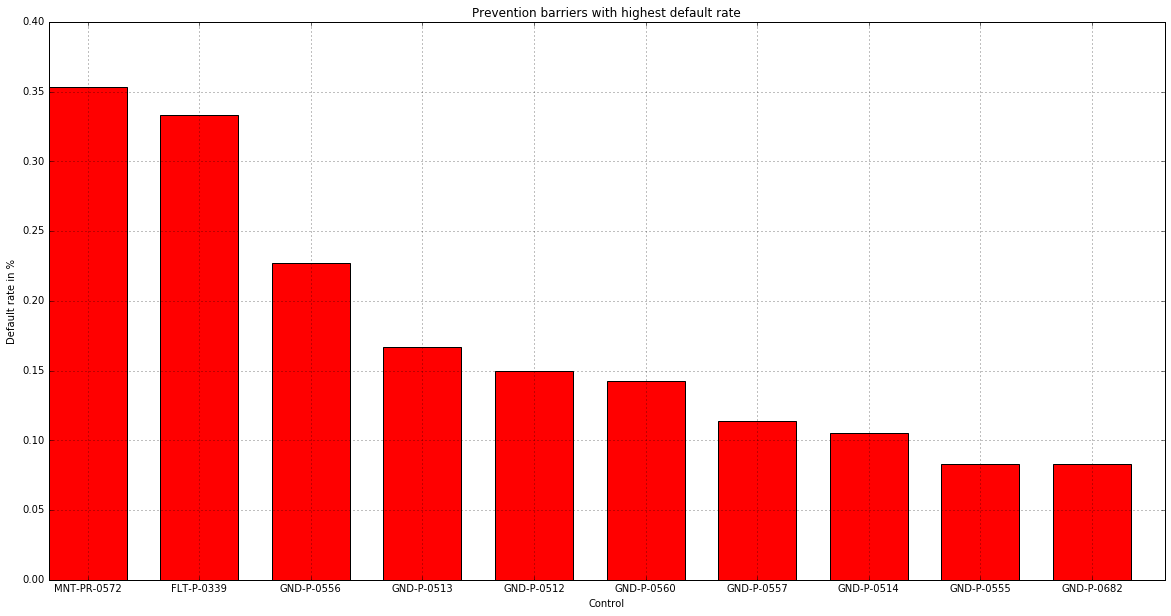

In [15]:
x=toptenprevention['Control Id']
y=toptenprevention['Default rate']
z=toptenprevention['Total number of time used']
#colors=('#F20202','#F31E1E','#F43A3A','#F65656','#F77272','#F98E8E','#FAAAAA','#FCC6C6','#FDE2E2','#FFFFFF')

#plt.bar(x,y)
N=10
fig, ax = plt.subplots(figsize=(20,10))
ind = np.arange(N)  # the x locations for the groups
width = 0.7       # the width of the bars
rects = ax.bar(ind, y, width, color='r')

ax.set_xticklabels(x)
ax.set_xticks(ind+width/2)
ax.set_xlabel('Control')
ax.set_ylabel('Default rate in %')
ax.set_title('Prevention barriers with highest default rate')

plt.grid(True)

plt.show()

### Draft conclusion
We've drafted a visualization of the ten prevention barriers with the highest default rate in the dataset. The next step would be to display :
1.control details under the xlabel 
2.number of time a prevention barrier has been used in different color to add a dimension to the visualization, high default rate for seldom used barriers is less important than lower default rate for frequently used barriers
3.visualize restoration barriers default rate which present the difficulty of very few consequences in the dataset so the default rate will have to be figured out in another way.